#Meg's Data

In [97]:
from __future__ import division

%matplotlib inline
import pandas as pd
import thinkdsp
import thinkplot
import autocorr
import numpy as np

In [98]:
#Ryan's fancy way of inputting data in an easier way
data_dict = {}
name = 'meg'
acts = ['walking', 'jogging', 'upstairs', 'downstairs']
data_file_names = ['data/{}_{}_long.csv'.format(name, activity) for activity in acts]
for i,file in enumerate(data_file_names):
    df = pd.read_csv(file)
    data_dict[acts[i]] = df

In [99]:
def evenly_sample_ts(ts):
    return np.linspace(ts.min(), ts.max(), len(ts))

###Data viewing of full data set

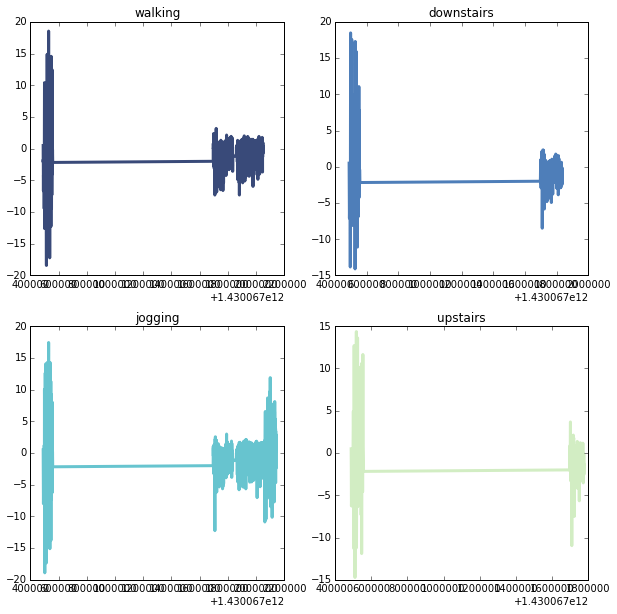

In [100]:
thinkplot.preplot(4, 2, 2)

for plotnum, (activity, data) in enumerate(data_dict.iteritems()):
    time = data.time.values
    vals = data.x.values
    evenly_sampled_ts = evenly_sample_ts(time)
    interp_vals = np.interp(evenly_sampled_ts, time, vals)
    
    thinkplot.subplot(plotnum+1)
    thinkplot.plot(evenly_sampled_ts, interp_vals)
    thinkplot.config(title=activity)

###Plot the wave

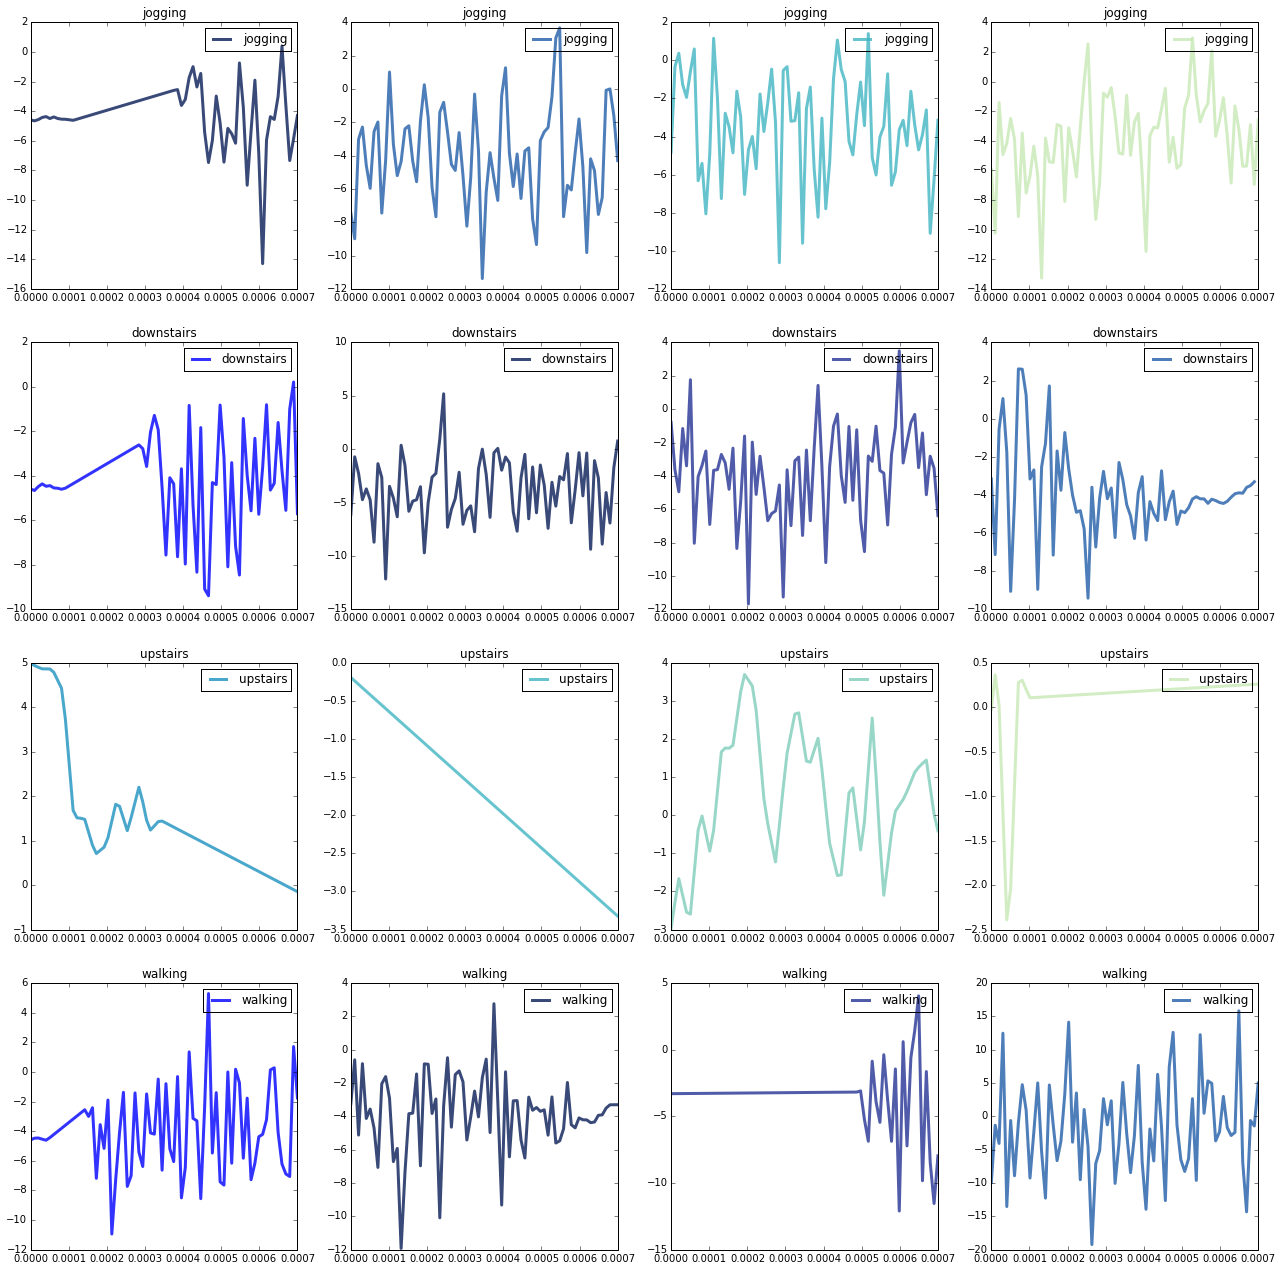

In [101]:
thinkplot.preplot(4, 4, 4)

for plotnum, (activity, data) in enumerate(meg_data_dict.iteritems()):
    time = data.time.values
    vals = data.x.values
    evenly_sampled_ts = evenly_sample_ts(time)
    interp_vals = np.interp(evenly_sampled_ts, time, vals)
    zwave = thinkdsp.Wave(interp_vals, framerate=100000)

    start0 = 0
    window_size = 0.0007
    seg_nums = 4
    
    for i in range(seg_nums):
        zseg = zwave.segment(start=start0+i*window_size, duration=window_size)
        thinkplot.subplot(4*plotnum+1+i)
        zseg.plot(label=activity)
        thinkplot.Config(title=activity)

###Frequency